<a href="https://colab.research.google.com/github/daniballester-ai/reducao_dimensionalidade_imagens/blob/main/reducao_dimensionalidade_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: Redução de Dimensionalidade em Imagens

Este notebook implementa a conversão de uma imagem colorida para escala de cinza e, em seguida, para uma imagem binária (preto e branco).

**Restrições:**
- As funções de conversão de cor não utilizam bibliotecas de processamento de imagem como OpenCV ou Pillow. Elas são implementadas "do zero" para fins de aprendizado.
- Bibliotecas são utilizadas apenas para carregar o arquivo da imagem e para visualizar os resultados.

**Passos:**
1.  **Carregar a Imagem:** A imagem "Lena" será baixada da internet e carregada como um array de pixels.
2.  **Converter para Níveis de Cinza:** Uma função aplicará a fórmula de luminosidade para converter cada pixel RGB em um único valor de cinza.
3.  **Converter para Binário:** Uma função aplicará um limiar (threshold) para transformar cada pixel cinza em preto (0) ou branco (255).
4.  **Visualizar Resultados:** As três imagens (original, cinza, binária) serão exibidas lado a lado.

In [1]:
# Instalaremos a biblioteca Pillow só para nos ajudar a abrir a imagem.

!pip install Pillow requests numpy

import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
# URL da imagem clássica "Lena"
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

# Download da imagem da URL
try:
    response = requests.get(url)
    # Abre a imagem a partir dos dados baixados
    img_original_pil = Image.open(BytesIO(response.content))

    # Converte a imagem PIL para um array NumPy
    # A imagem se torna uma matriz 3D: (altura, largura, 3 canais de cor R,G,B)
    array_original = np.array(img_original_pil)

    print("Imagem carregada com sucesso!")
    print("Dimensões do array da imagem:", array_original.shape)
    print("Tipo de dados dos pixels:", array_original.dtype)

    # Garante que a imagem tenha apenas 3 canais (RGB), removendo o canal alfa (transparência) se existir
    if array_original.shape[2] == 4:
      array_original = array_original[:, :, :3]
      print("Canal alfa removido. Novas dimensões:", array_original.shape)

except Exception as e:
    print(f"Não foi possível carregar a imagem: {e}")

Imagem carregada com sucesso!
Dimensões do array da imagem: (512, 512, 3)
Tipo de dados dos pixels: uint8


##  Função para Converter de Colorido para Níveis de Cinza (Célula de Código)

In [3]:
def colorido_para_cinza(array_rgb):
    """
    Converte um array de imagem RGB para escala de cinza usando a fórmula de luminosidade.

    Argumentos:
    array_rgb (np.array): Um array NumPy com formato (altura, largura, 3) representando a imagem colorida.

    Retorna:
    np.array: Um array NumPy com formato (altura, largura) representando a imagem em escala de cinza.
    """
    print("Iniciando conversão para níveis de cinza...")
    # A fórmula de luminosidade pondera as cores de acordo com a percepção humana:
    # Cinza = 0.299 * Vermelho + 0.587 * Verde + 0.114 * Azul
    # Esses pesos são padrões da indústria (Rec. 601)
    pesos_rgb = np.array([0.299, 0.587, 0.114])

    # Pega as dimensões da imagem
    altura, largura, _ = array_rgb.shape

    # Cria um array vazio (preenchido com zeros) com as dimensões da imagem final (sem o canal de cor)
    array_cinza = np.zeros((altura, largura), dtype=np.uint8)

    # Itera sobre cada pixel da imagem
    for i in range(altura):
        for j in range(largura):
            # Pega o pixel [R, G, B] na posição (i, j)
            pixel_rgb = array_rgb[i, j]

            # Aplica a fórmula de luminosidade: multiplica os valores RGB pelos pesos e soma os resultados
            valor_cinza = np.dot(pixel_rgb, pesos_rgb)

            # Atribui o valor calculado ao pixel correspondente no novo array de cinza
            # Convertemos para np.uint8 para garantir que o valor seja um inteiro entre 0 e 255
            array_cinza[i, j] = np.uint8(valor_cinza)

    print("Conversão para níveis de cinza finalizada!")
    return array_cinza

## Função para Converter de Níveis de Cinza para Binário (Célula de Código)

In [5]:
def cinza_para_binario(array_cinza, limiar=127):
    """
    Converte um array de imagem em escala de cinza para uma imagem binária (preto e branco).

    Argumentos:
    array_cinza (np.array): Um array NumPy com formato (altura, largura) representando a imagem em escala de cinza.
    limiar (int): O valor de corte (0-255). Pixels acima do limiar viram branco (255),
                  e pixels abaixo ou iguais viram preto (0). O padrão é 127.

    Retorna:
    np.array: Um array NumPy com formato (altura, largura) representando a imagem binária.
    """
    print(f"Iniciando binarização com limiar = {limiar}...")
    # Pega as dimensões da imagem
    altura, largura = array_cinza.shape

    # Cria um array vazio para a imagem binária
    array_binario = np.zeros((altura, largura), dtype=np.uint8)

    # Itera sobre cada pixel da imagem em escala de cinza
    for i in range(altura):
        for j in range(largura):
            # Pega o valor do pixel cinza na posição (i, j)
            pixel_cinza = array_cinza[i, j]

            # Aplica a regra do limiar
            if pixel_cinza > limiar:
                array_binario[i, j] = 255 # Branco
            else:
                array_binario[i, j] = 0   # Preto

    print("Binarização finalizada!")
    return array_binario

## Executar as Conversões e Exibir os Resultados

Iniciando conversão para níveis de cinza...
Conversão para níveis de cinza finalizada!
Iniciando binarização com limiar = 127...
Binarização finalizada!


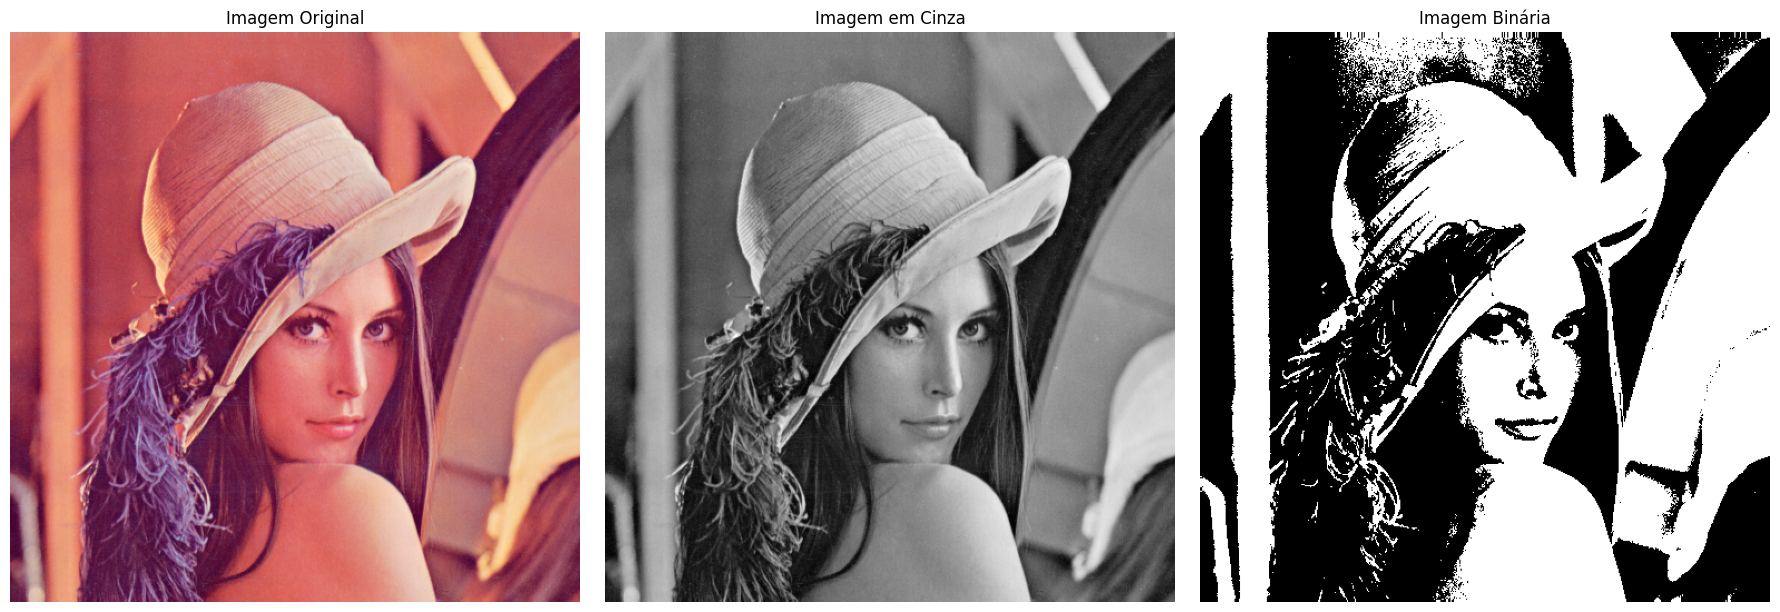

In [6]:
# Garante que a imagem foi carregada antes de prosseguir
if 'array_original' in locals():
    # 1. Converte a imagem original colorida para níveis de cinza
    array_niveis_de_cinza = colorido_para_cinza(array_original)

    # 2. Converte a imagem em níveis de cinza para binária
    # Você pode experimentar outros valores de limiar, como 100 ou 150.
    array_binario = cinza_para_binario(array_niveis_de_cinza, limiar=127)

    # 3. Configura a exibição das três imagens
    plt.figure(figsize=(18, 6)) # Define o tamanho da figura que conterá as imagens

    # Imagem Original
    plt.subplot(1, 3, 1) # (1 linha, 3 colunas, posição 1)
    plt.imshow(array_original)
    plt.title('Imagem Original')
    plt.axis('off') # Remove os eixos x e y

    # Imagem em Níveis de Cinza
    plt.subplot(1, 3, 2) # (1 linha, 3 colunas, posição 2)
    plt.imshow(array_niveis_de_cinza, cmap='gray') # cmap='gray' é essencial para exibir corretamente
    plt.title('Imagem em Cinza')
    plt.axis('off')

    # Imagem Binária
    plt.subplot(1, 3, 3) # (1 linha, 3 colunas, posição 3)
    plt.imshow(array_binario, cmap='gray')
    plt.title('Imagem Binária')
    plt.axis('off')

    plt.tight_layout() # Ajusta os subplots para que não se sobreponham
    plt.show()

else:
    print("A imagem original não foi carregada. Execute a célula de carregamento primeiro.")